In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [5]:
insurance =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [29]:
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown='ignore'),["sex","smoker","region"])
)

In [26]:
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

X, y

(      age     sex     bmi  children smoker     region
 0      19  female  27.900         0    yes  southwest
 1      18    male  33.770         1     no  southeast
 2      28    male  33.000         3     no  southeast
 3      33    male  22.705         0     no  northwest
 4      32    male  28.880         0     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1333   50    male  30.970         3     no  northwest
 1334   18  female  31.920         0     no  northeast
 1335   18  female  36.850         0     no  southeast
 1336   21  female  25.800         0     no  southwest
 1337   61  female  29.070         0    yes  northwest
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_test

(      age     sex     bmi  children smoker     region
 331    52    male  27.360         0    yes  northwest
 796    30    male  44.220         2     no  southeast
 1039   19    male  27.265         2     no  northwest
 261    20  female  26.840         1    yes  southeast
 70     27  female  24.750         0    yes  southeast
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.350         4     no  northeast
 1130   39  female  23.870         5     no  southeast
 1294   58    male  25.175         0     no  northeast
 860    37  female  47.600         2    yes  southwest
 1126   55    male  29.900         0     no  southwest
 
 [1137 rows x 6 columns],
       age     sex     bmi  children smoker     region
 764    45  female  25.175         2     no  northeast
 887    36  female  30.020         0     no  northwest
 890    64  female  26.885         0    yes  northwest
 1293   46    male  25.745         3     no  northwest
 259    19    male  31.920         0 

In [30]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [34]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal, X_test_normal

(array([[0.73913043, 0.30669895, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.26086957, 0.76029056, 0.4       , ..., 0.        , 1.        ,
         0.        ],
        [0.02173913, 0.30414313, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.27858488, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.6

In [107]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="exponential"),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mse,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.008),
                        metrics=["mse"])

history = insurance_model.fit(X_train_normal, y_train, epochs = 200, callbacks=[callback])

Epoch 1/200
36/36 [==============================] - 1s 3ms/step - loss: 320957248.0000 - mse: 320957248.0000
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 298913152.0000 - mse: 298913152.0000
Epoch 3/200
36/36 [==============================] - 0s 4ms/step - loss: 147763504.0000 - mse: 147763504.0000
Epoch 4/200
36/36 [==============================] - 0s 4ms/step - loss: 56185292.0000 - mse: 56185292.0000
Epoch 5/200
36/36 [==============================] - 0s 5ms/step - loss: 39413504.0000 - mse: 39413504.0000
Epoch 6/200
36/36 [==============================] - 0s 4ms/step - loss: 35752136.0000 - mse: 35752136.0000
Epoch 7/200
36/36 [==============================] - 0s 4ms/step - loss: 32745214.0000 - mse: 32745214.0000
Epoch 8/200
36/36 [==============================] - 0s 4ms/step - loss: 32193642.0000 - mse: 32193642.0000
Epoch 9/200
36/36 [==============================] - 0s 4ms/step - loss: 30667650.0000 - mse: 30667650.0000
Epoch 10/200
36/36 [==

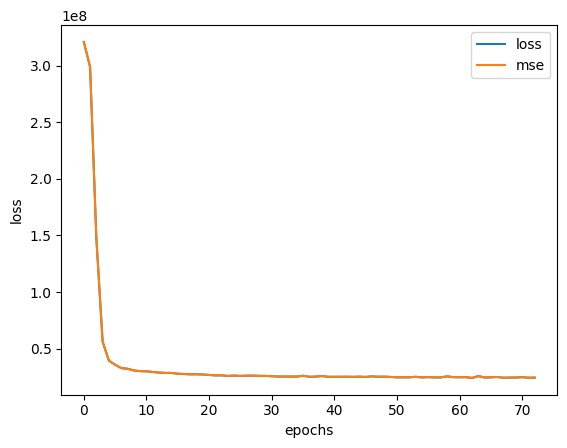

In [108]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss");

In [109]:
insurance_model.evaluate(X_test_normal, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 24436484.0000 - mse: 24436484.0000


[24436484.0, 24436484.0]

In [112]:
y_pred = insurance_model.predict(X_train_normal)
y_pred, y_test

36/36 [==============================] - 0s 1ms/step


(array([[27681.912 ],
        [ 5993.3003],
        [ 4473.9385],
        ...,
        [11804.815 ],
        [61097.496 ],
        [10692.247 ]], dtype=float32),
 764      9095.06825
 887      5272.17580
 890     29330.98315
 1293     9301.89355
 259     33750.29180
            ...     
 636      2709.11190
 1073    12096.65120
 31       2198.18985
 351      8932.08400
 1137     3176.28770
 Name: charges, Length: 201, dtype: float64)

In [111]:
y_pred - tf.squeeze(y_test)

<tf.Tensor: shape=(1137, 201), dtype=float64, numpy=
array([[ 18586.84385937,  22409.73630937,  -1649.07104063, ...,
         25483.72225938,  18749.82810937,  24505.62440937],
       [ -3101.76795703,    721.12449297, -23337.68285703, ...,
          3795.11044297,  -2938.78370703,   2817.01259297],
       [ -4621.12977344,   -798.23732344, -24857.04467344, ...,
          2275.74862656,  -4458.14552344,   1297.65077656],
       ...,
       [  2709.74717969,   6532.63962969, -17526.16772031, ...,
          9606.62557969,   2872.73142969,   8628.52772969],
       [ 52002.42784375,  55825.32029375,  31766.51294375, ...,
         58899.30624375,  52165.41209375,  57921.20839375],
       [  1597.17882031,   5420.07127031, -18638.73607969, ...,
          8494.05722031,   1760.16307031,   7515.95937031]])>